In [ ]:
!pip install photutils #only needed if its being run on colabs
import numpy as np
from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_noise_image
import matplotlib.pyplot as plt
from photutils.background import Background2D, MedianBackground
from photutils.isophote import EllipseGeometry, IsophoteList
from photutils.aperture import EllipticalAperture
from astropy.io import fits
from astropy.stats import SigmaClip

In [ ]:
# Directory path
dir = "/content/sample_data/"

# File names for each filter
filename_R = f"{dir}m57_Red_mask_combined.fits"
filename_G = f"{dir}m57_Green_mask_combined.fits"
filename_B = f"{dir}m57_Blue_mask_combined.fits"

# Load data for each channel
data_R = fits.getdata(filename_R)
data_G = fits.getdata(filename_G)
data_B = fits.getdata(filename_B)

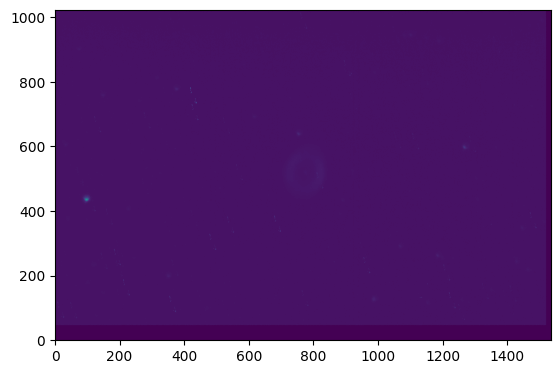

In [ ]:
data = data_B

plt.imshow(data, origin='lower')

#This method works by fitting isophotes to the image.

(<matplotlib.patches.Ellipse at 0x7e6cdf8e21d0>,)

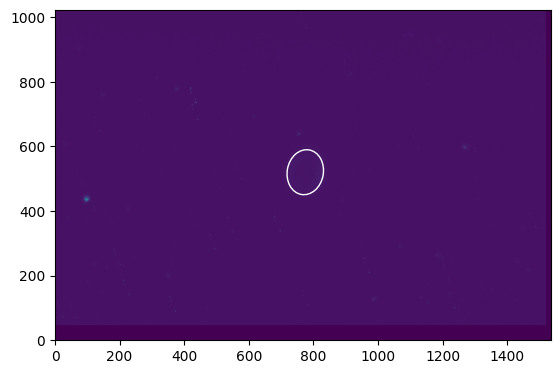

In [ ]:
#geometry = EllipseGeometry(x0=828, y0=358, sma=80, eps=0.2, pa=80.0 * np.pi / 180.0) # initial guess for the isophote #RED
#geometry = EllipseGeometry(x0=800, y0=445, sma=70, eps=0.2, pa=80.0 * np.pi / 180.0) # initial guess for the isophote #GREEN
geometry = EllipseGeometry(x0=775, y0=520, sma=70, eps=0.2, pa=80.0 * np.pi / 180.0) # initial guess for the isophote #BLUE
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma, geometry.sma * (1 - geometry.eps), geometry.pa)
plt.imshow(data, origin='lower')
aper.plot(color='white')

In [ ]:
from photutils.isophote import Ellipse
ellipse = Ellipse(data, geometry)
isolist = ellipse.fit_image() #this returns a list of the fitted isophotes. you can check everything thats returned by looking at the IsophoteList object documentation
print(isolist.to_table())

       sma               intens           intens_err     ... nflag niter stop_code
                                                         ...                      
------------------ ------------------ ------------------ ... ----- ----- ---------
               0.0 1014.3792087273762                0.0 ...     0     0         0
0.5420896268773124  994.6062010834438 0.6193470167952843 ...     0    10         0
0.5962985895650437  992.4689714084075 0.6457757478170622 ...     0    10         0
0.6559284485215481  990.3077885430271  0.678251292211472 ...     0    10         0
 0.721521293373703  988.1785272618266 0.7210089040643632 ...     0    10         0
0.7936734227110733  986.6291437438368  0.825623145965669 ...     0    10         0
0.8730407649821808  984.8939499416988 0.9279696264558965 ...     0    10         0
0.9603448414803989  983.1231499890582  1.034767010751329 ...     0    20         0
1.0563793256284388  985.5799192958367  2.546393881560469 ...     0    50         2
    

In [ ]:
#k, k_err = 2.55196689e-20, 5.53367001e-24 # RED
#k, k_err = 2.03848835e-20, 5.09520706e-24 # GREEN
k, k_err = 5.86502613e-20, 1.925112413e-23 # BLUE

Text(0.5, 1.0, 'Intensity vs Semi Major Axis for blue filter')

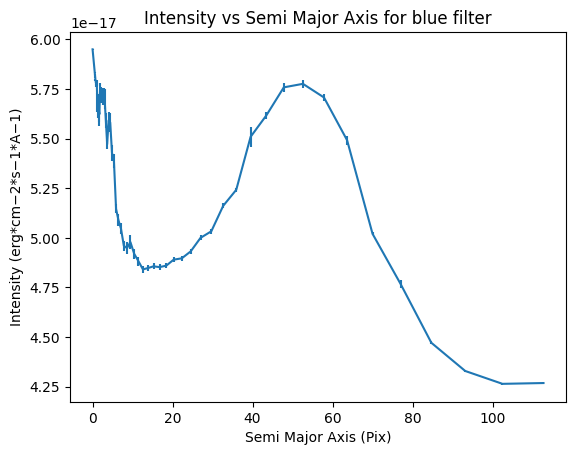

In [ ]:
plt.errorbar(isolist.sma, isolist.intens * k, yerr=np.sqrt((k * isolist.int_err) ** 2 + (isolist.intens * k_err) ** 2))
plt.xlabel("Semi Major Axis (Pix)")
plt.ylabel("Intensity (erg*cm−2*s−1*A−1)")
plt.title("Intensity vs Semi Major Axis for blue filter")

2.739975910854286


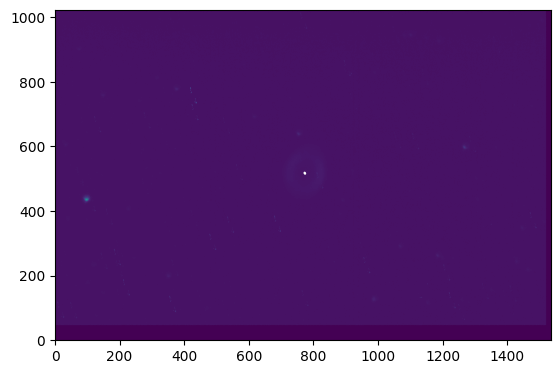

In [ ]:
plt.imshow(data, origin='lower')

#for i in range(5):
#  aper = EllipticalAperture((isolist.x0[i*10+1], isolist.y0[i*10+1]), isolist.sma[i*10+1], isolist.sma[i*10+1] * (1 - isolist.eps[i*10+1]), isolist.pa[i*10+1])
#  aper.plot(color='white')

a = 18

aper = EllipticalAperture((isolist.x0[a], isolist.y0[a]), isolist.sma[a], isolist.sma[a] * (1 - isolist.eps[a]), isolist.pa[a])
aper.plot(color='white')

print(isolist.sma[a])

In [ ]:
# Remove problematic isophotes

#new_isolist = IsophoteList([isophote for i, isophote in enumerate(isolist) if i not in [51, 52, 56, 57, 58, 59]]) # RED
#new_isolist = IsophoteList([isophote for i, isophote in enumerate(isolist) if i not in [18, 49, 50, 56, 57, 58, 59]]) # GREEN
new_isolist = IsophoteList([isophote for i, isophote in enumerate(isolist) if i not in [56, 57, 58, 59]]) # BLUE

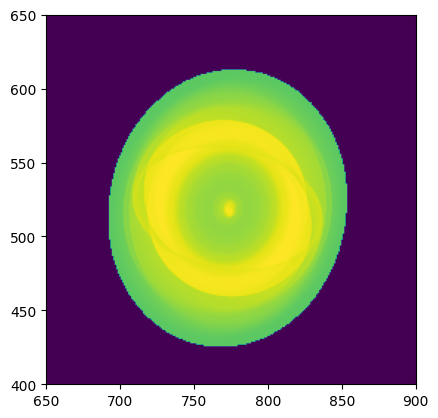

In [ ]:
from photutils.isophote import build_ellipse_model
model_image = build_ellipse_model(data.shape, new_isolist)

# Define the zoomed-in region (adjust these limits to focus on the nebula)
x_min, x_max = 650, 900  # Example x-axis range
y_min, y_max = 400, 650  # Example y-axis range

# Set the limits to "zoom in" on the region of interest
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.imshow(model_image, origin='lower')

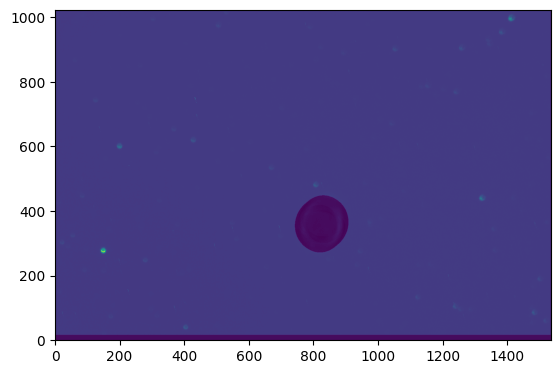

In [ ]:
#Plot the residual
re = data - model_image
plt.imshow(re, origin='lower')